In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Iris.csv")

# Some Basic Information About Dataset

In [36]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [6]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [51]:
df.shape

(150, 5)

In [46]:
missing_values = df.isnull().sum()
print(missing_values)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.drop("Id",axis=1,inplace=True)

In [10]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [82]:
pd.pivot_table(df,index=["Species"],values=["SepalLengthCm","SepalWidthCm"],aggfunc=[np.mean,len])

mean                        len             
                SepalLengthCm SepalWidthCm SepalLengthCm SepalWidthCm
Species                                                              
Iris-setosa             5.006        3.418            50           50
Iris-versicolor         5.936        2.770            50           50
Iris-virginica          6.588        2.974            50           50

In [83]:
pd.pivot_table(df,index=["Species"],values=["PetalLengthCm","PetalWidthCm"],aggfunc=[np.mean,len])

mean                        len             
                PetalLengthCm PetalWidthCm PetalLengthCm PetalWidthCm
Species                                                              
Iris-setosa             1.464        0.244            50           50
Iris-versicolor         4.260        1.326            50           50
Iris-virginica          5.552        2.026            50           50

# Data Visualization (All the parts)

## Analysis Using Seaborn Library -

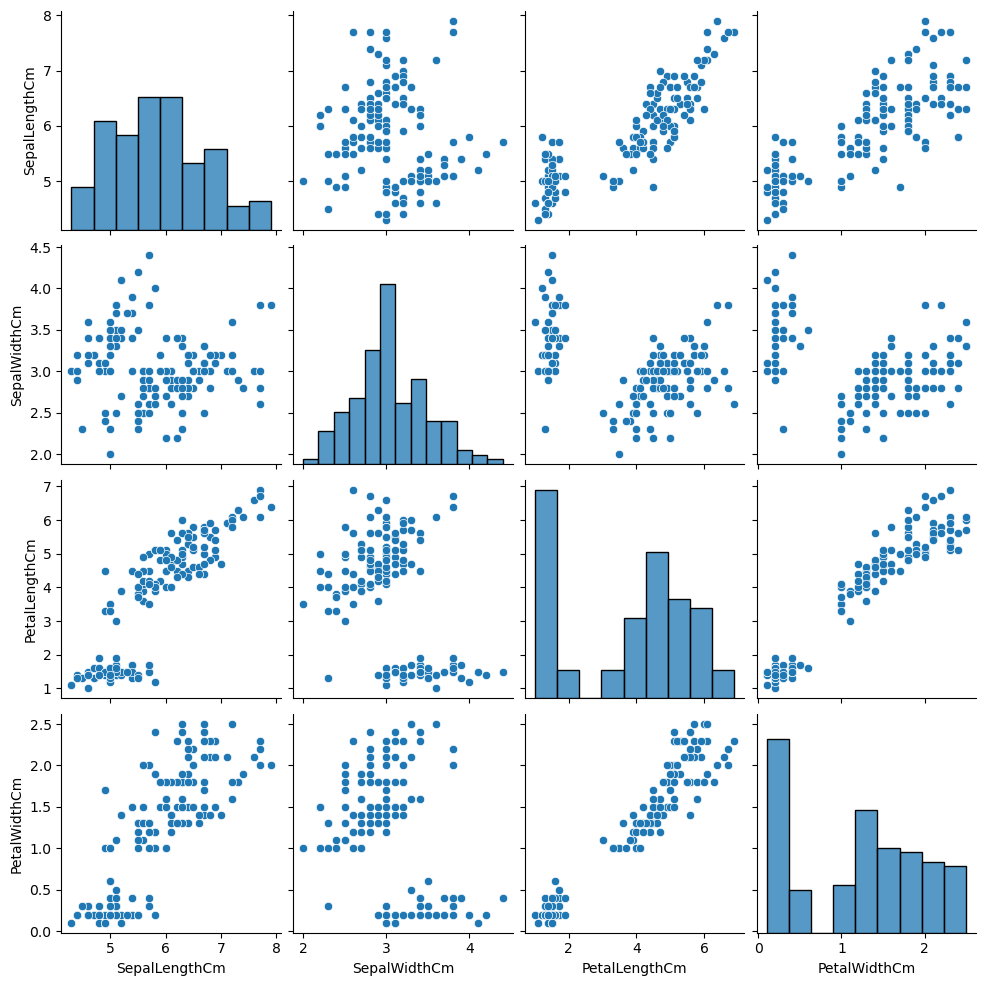

In [11]:
sns.pairplot(df)

<Axes: xlabel='SepalLengthCm'>

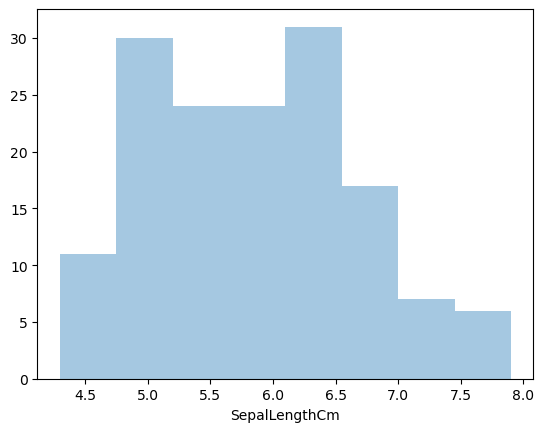

In [12]:
sns.distplot(df["SepalLengthCm"],kde =False)

<Axes: xlabel='SepalWidthCm'>

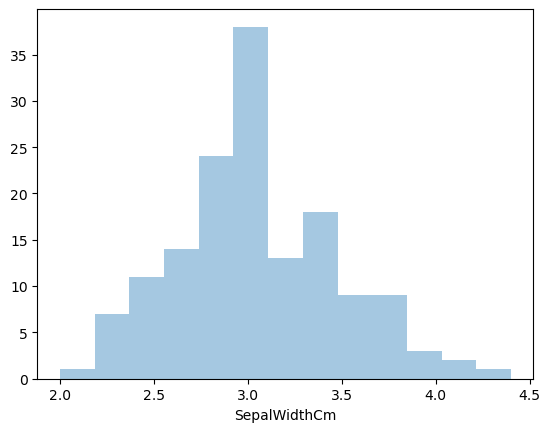

In [13]:
sns.distplot(df["SepalWidthCm"],kde =False)

<Axes: xlabel='PetalLengthCm'>

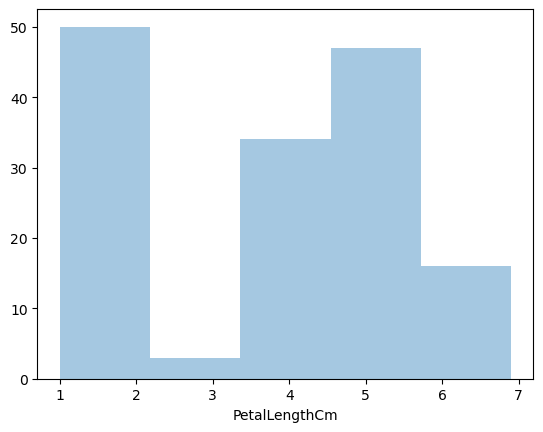

In [14]:
sns.distplot(df["PetalLengthCm"],kde =False)

<Axes: xlabel='PetalWidthCm'>

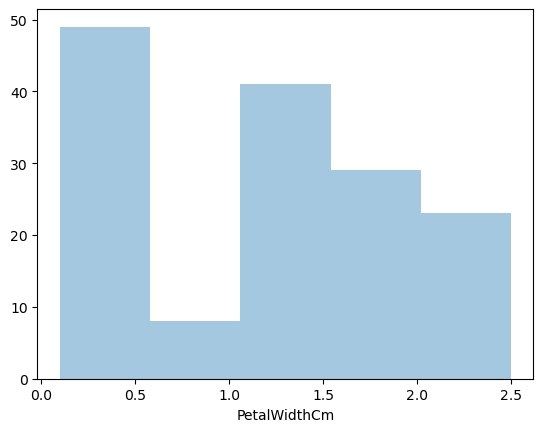

In [15]:
sns.distplot(df["PetalWidthCm"],kde =False)

In [16]:
df.SepalLengthCm.skew()

0.3149109566369728

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

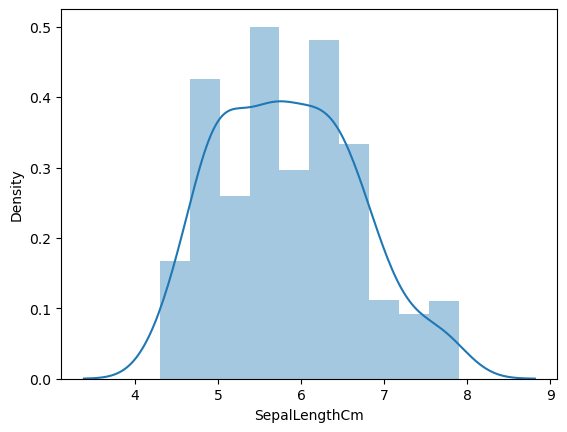

In [17]:
sns.distplot(df.SepalLengthCm,bins=10)

### Checking for Outliers Using BoxPlot

<Axes: >

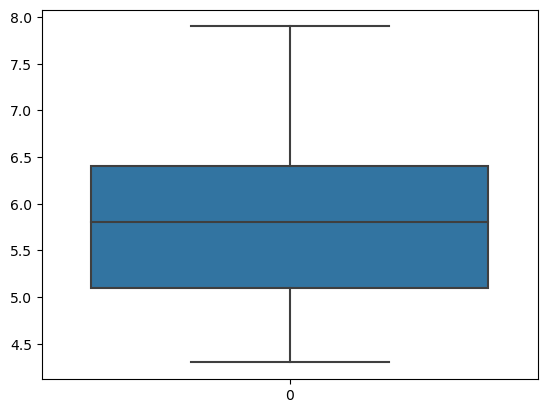

In [18]:
sns.boxplot(df.SepalLengthCm)

<Axes: >

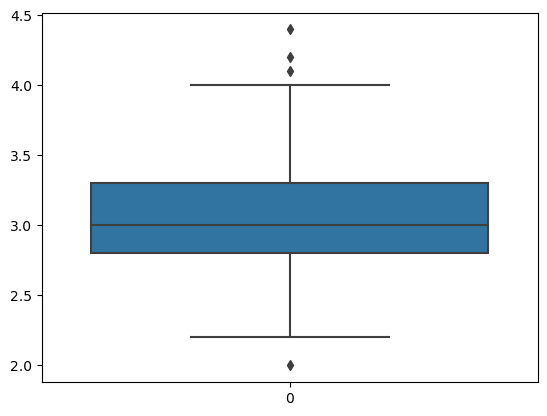

In [19]:
sns.boxplot(df.SepalWidthCm)

<Axes: >

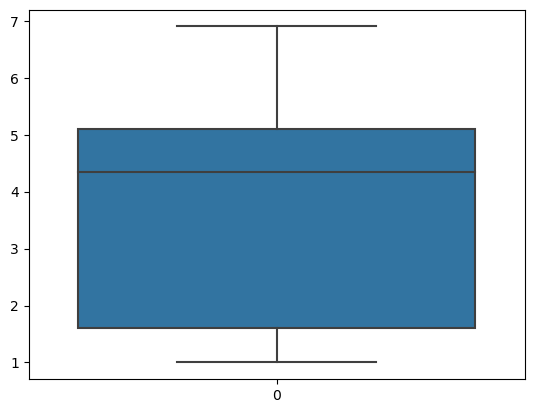

In [20]:
sns.boxplot(df.PetalLengthCm)

<Axes: >

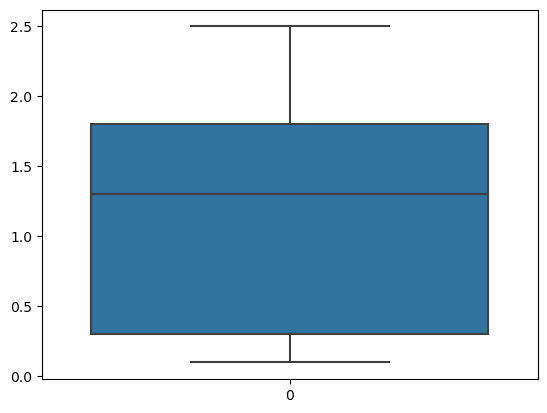

In [21]:
sns.boxplot(df.PetalWidthCm)

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

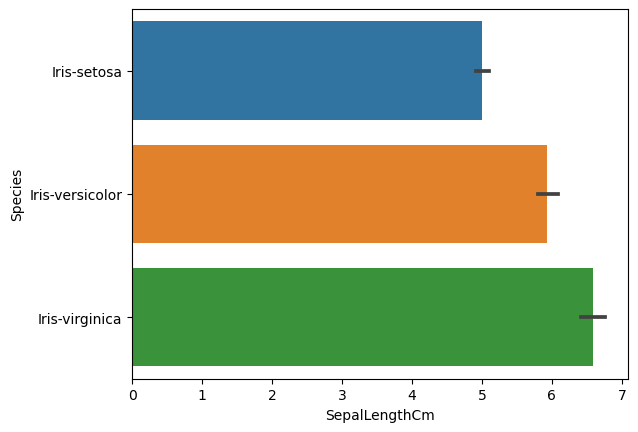

In [84]:
sns.barplot(data=df, x='SepalLengthCm', y='Species')

<Axes: xlabel='SepalWidthCm', ylabel='Species'>

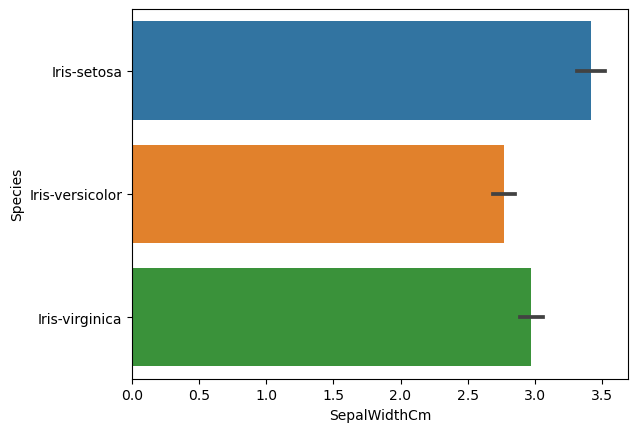

In [85]:
sns.barplot(data=df, x='SepalWidthCm', y='Species')

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

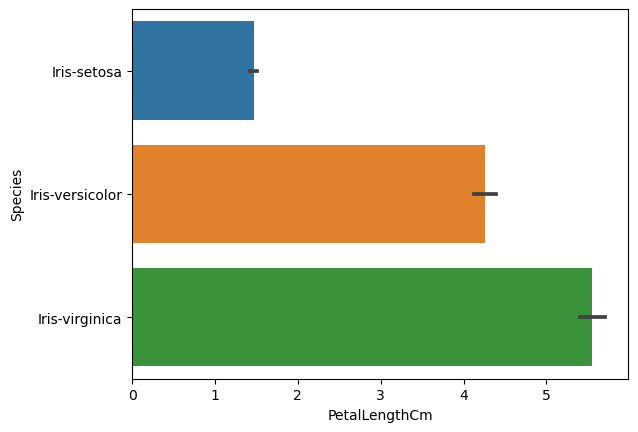

In [86]:
sns.barplot(data=df, x='PetalLengthCm', y='Species')

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

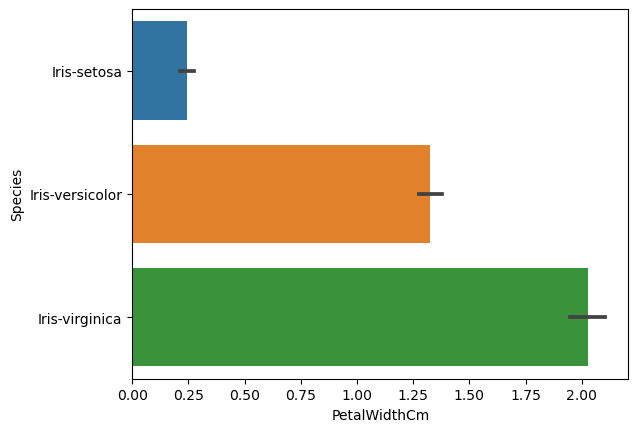

In [87]:
sns.barplot(data=df, x='PetalWidthCm', y='Species')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

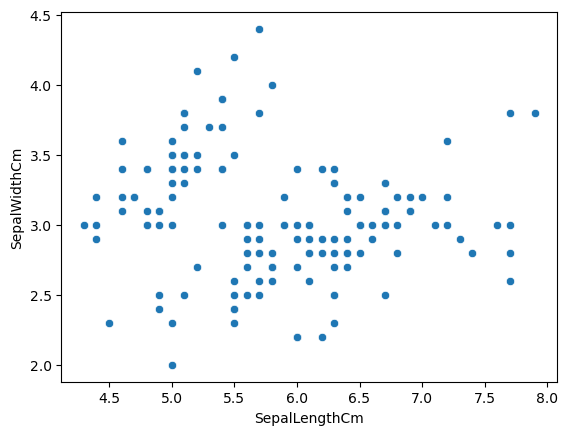

In [23]:
sns.scatterplot(x=df.SepalLengthCm,y=df.SepalWidthCm)

### Code to Check for Outlier Columns -

In [24]:

float_columns = df.select_dtypes(include='float').columns
integer_columns = df.select_dtypes(include='integer').columns


for column in float_columns:
  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

    
    print(f"Outliers in float column {column}:")
    print(outliers)
    print("\n")


for column in integer_columns:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]


    print(f"Outliers in integer column {column}:")
    print(outliers)
    print("\n")

Outliers in float column SepalLengthCm:
Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers in float column SepalWidthCm:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
15            5.7           4.4            1.5           0.4      Iris-setosa
32            5.2           4.1            1.5           0.1      Iris-setosa
33            5.5           4.2            1.4           0.2      Iris-setosa
60            5.0           2.0            3.5           1.0  Iris-versicolor


Outliers in float column PetalLengthCm:
Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers in float column PetalWidthCm:
Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []




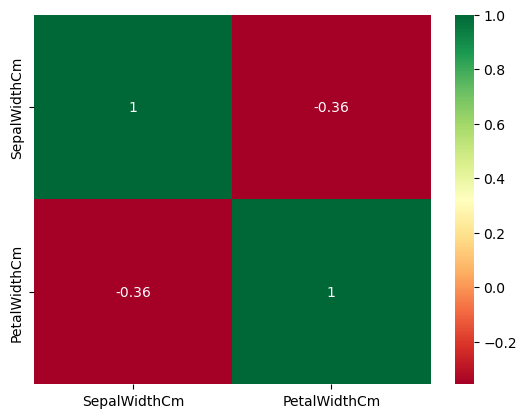

In [26]:
Source = df[["SepalWidthCm","PetalWidthCm"]]
source_corr = Source.corr()

ax = sns.heatmap(source_corr,
                 xticklabels=source_corr.columns,
                 yticklabels=source_corr.columns,
                 annot = True,
                 cmap ="RdYlGn")

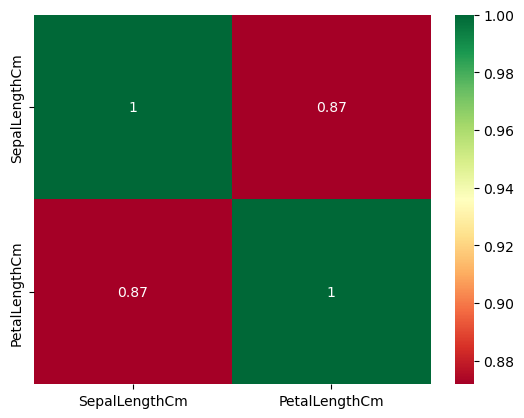

In [27]:
Source = df[["SepalLengthCm","PetalLengthCm"]]
source_corr = Source.corr()

ax = sns.heatmap(source_corr,
                 xticklabels=source_corr.columns,
                 yticklabels=source_corr.columns,
                 annot = True,
                 cmap ="RdYlGn")

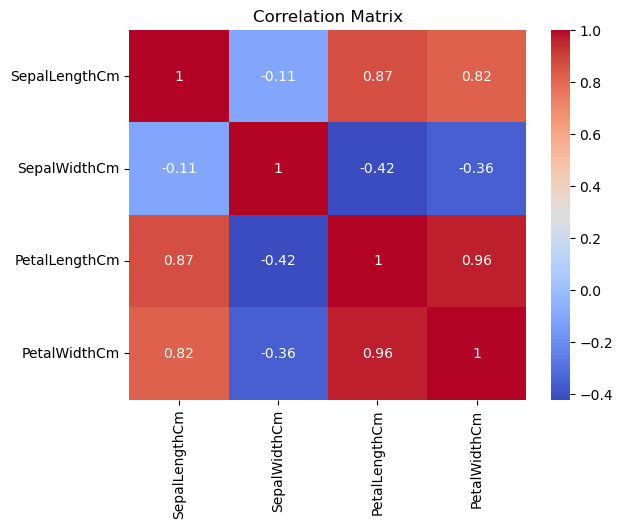

In [70]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

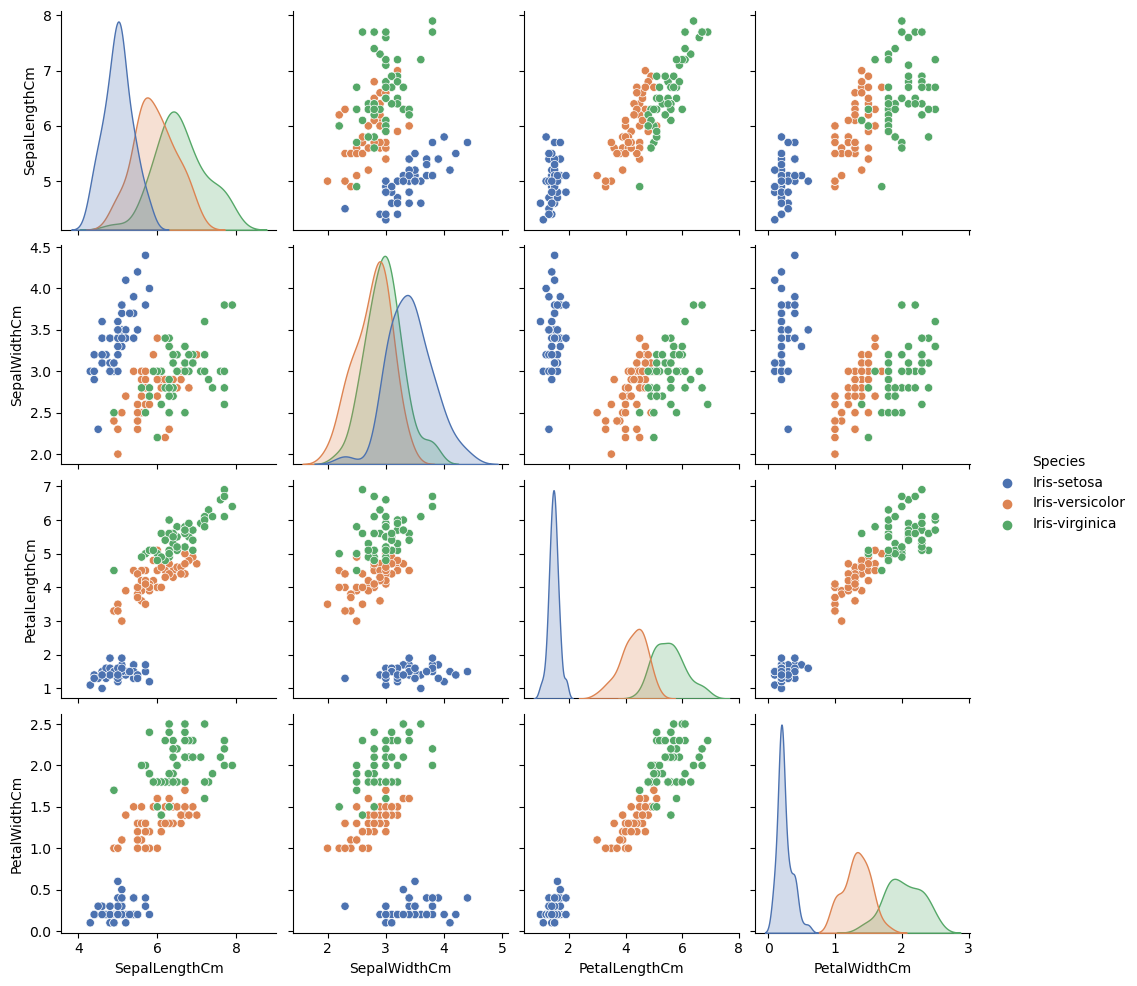

In [28]:
sns.pairplot(df,hue="Species",palette="deep")

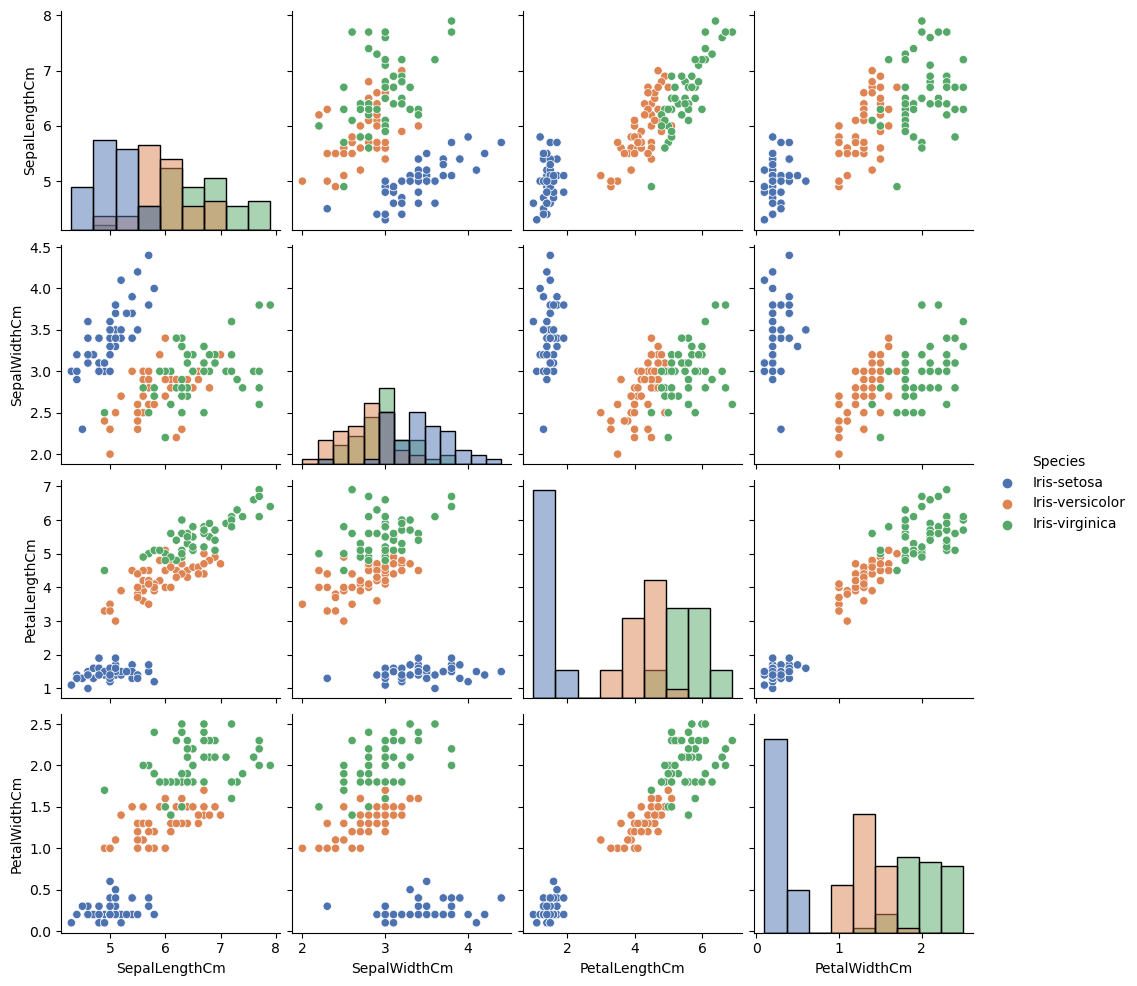

In [29]:
sns.pairplot(df,hue="Species",palette="deep",diag_kind="hist")

In [30]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [31]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

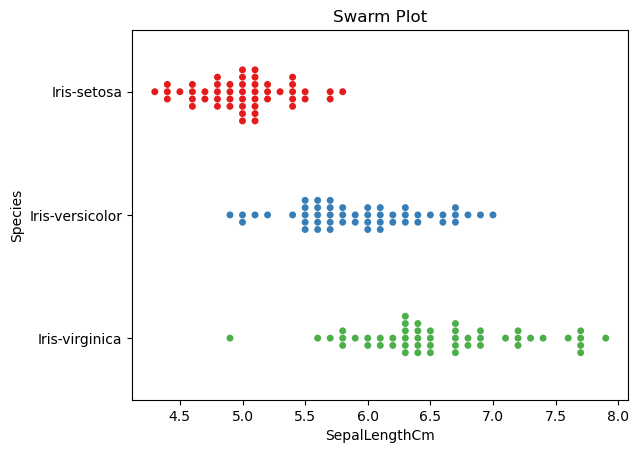

In [91]:

sns.swarmplot(x='SepalLengthCm', y='Species', data=df, palette='Set1')

plt.title('Swarm Plot')

plt.show()

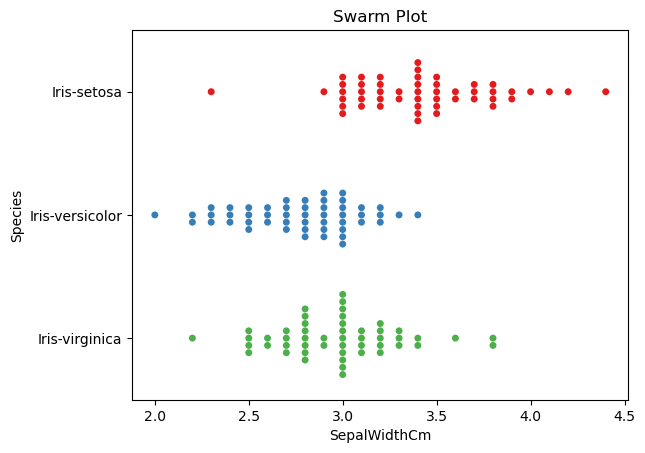

In [90]:
sns.swarmplot(x='SepalWidthCm', y='Species', data=df, palette='Set1')


plt.title('Swarm Plot')

plt.show()

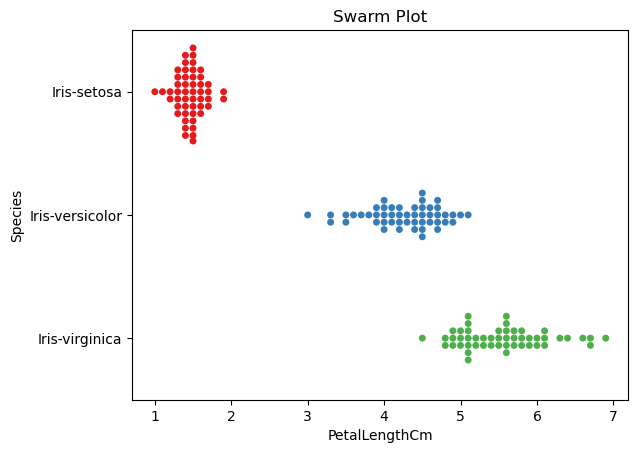

In [89]:

sns.swarmplot(x='PetalLengthCm', y='Species', data=df, palette='Set1')


plt.title('Swarm Plot')

plt.show()

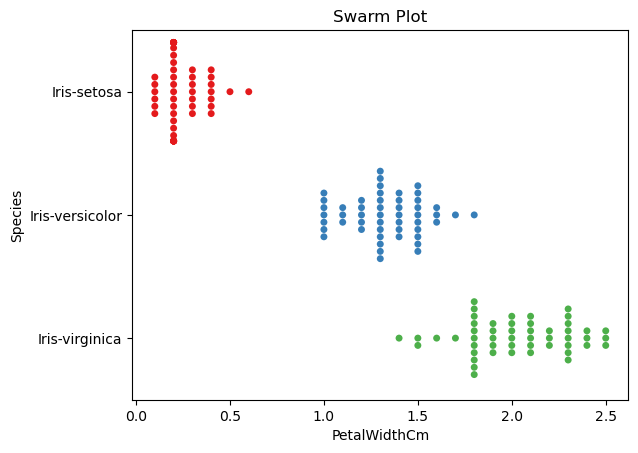

In [88]:

sns.swarmplot(x='PetalWidthCm', y='Species', data=df, palette='Set1')

plt.title('Swarm Plot')

plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

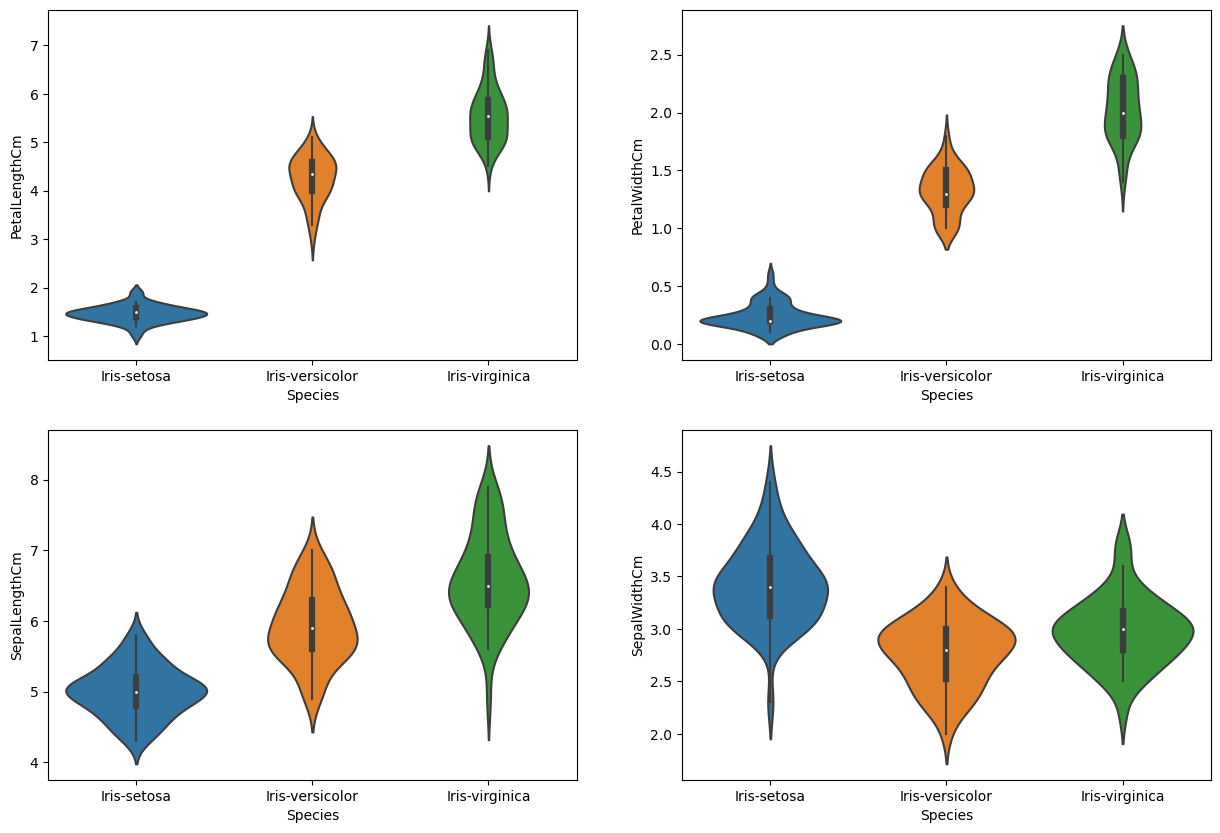

In [78]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

## Using MATPLOTLIB Library 

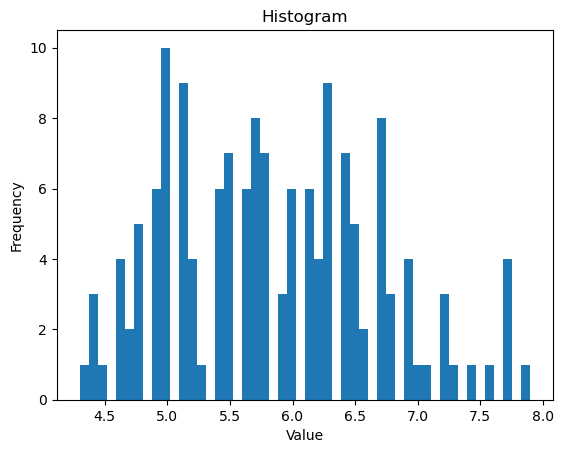

In [68]:
# Generate a vertical bar plot
plt.hist(df['SepalLengthCm'], bins = 50)

# Set plot labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()

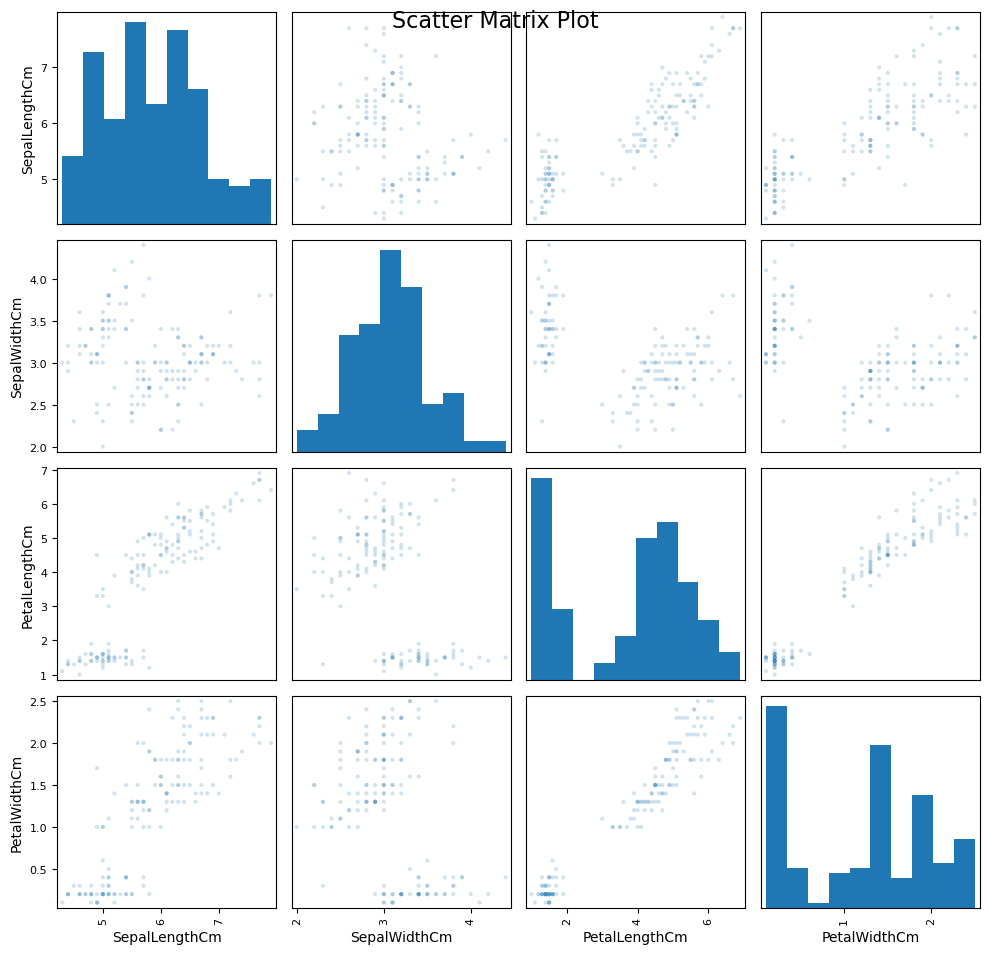

In [37]:
scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='hist')

plt.suptitle('Scatter Matrix Plot', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

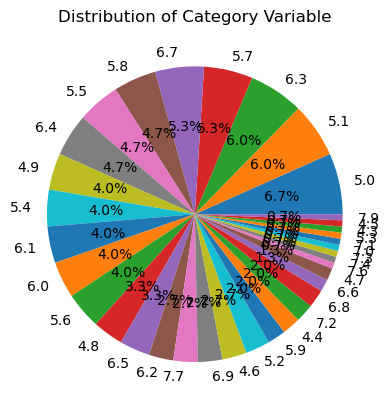

In [43]:
df['SepalLengthCm'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Category Variable')
plt.show()

In [48]:
cross_tab = pd.crosstab(df['SepalLengthCm'], df['Species'])
print(cross_tab)

Species        Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm                                              
4.3                      1                0               0
4.4                      3                0               0
4.5                      1                0               0
4.6                      4                0               0
4.7                      2                0               0
4.8                      5                0               0
4.9                      4                1               1
5.0                      8                2               0
5.1                      8                1               0
5.2                      3                1               0
5.3                      1                0               0
5.4                      5                1               0
5.5                      2                5               0
5.6                      0                5               1
5.7                      2              

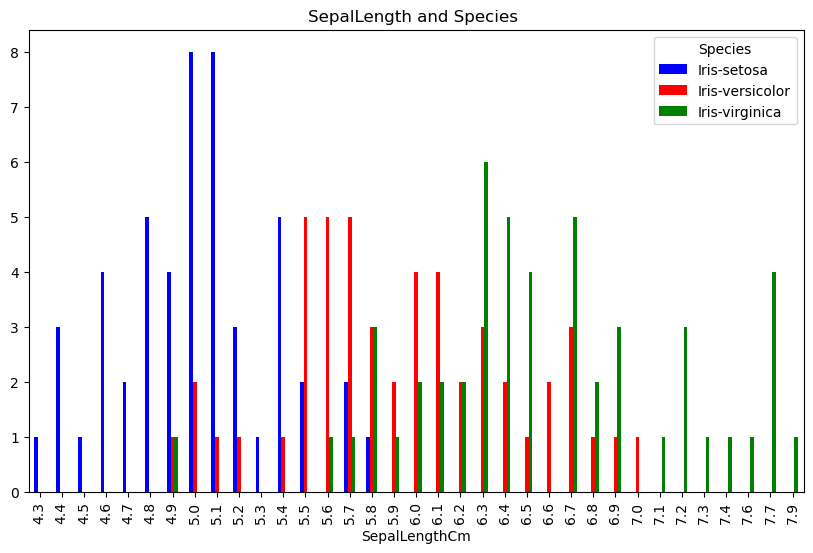

In [58]:
pd.crosstab(df["SepalLengthCm"], df["Species"]).plot(kind="bar", figsize=(10, 6), color=["blue","red","green"], title="SepalLength and Species ")
plt.show()

## Using PLOTLY Library 

In [61]:
fig = px.strip(df, x='SepalLengthCm', y='Species', color='SepalLengthCm')
fig.show()

In [64]:
fig = px.line(df, x="SepalLengthCm", y="Species")
fig.show()

In [65]:
fig = px.scatter(df, x="SepalLengthCm", y="Species")
fig.show()

In [71]:
fig = px.scatter(df, x="SepalWidthCm", y="Species")
fig.show()

In [72]:
fig = px.scatter(df, x="PetalLengthCm", y="Species")
fig.show()

In [73]:
fig = px.scatter(df, x="PetalWidthCm", y="Species")
fig.show()

In [75]:
fig = px.imshow(df.corr())
fig.show()

In [76]:
fig = px.scatter_3d(df, x="SepalLengthCm", y="SepalWidthCm", z="Species")
fig.show()

In [77]:
fig = px.scatter_3d(df, x="PetalLengthCm", y="PetalWidthCm", z="Species")
fig.show()

# Conclusion 

We Can Conlude the following - 
1. There are 4 Outliers in the SepalWidth Column which need to be resolved 
2. SepalLength and PetalLength are correlated to each other 
3. Petallength and Petalwidth are correlated to each other with 0.96
4. wheras SepalL and SepalW are not correlated (with -0.11)